# STATUS OF PAPER:  
  
  
<font color='green'>  
100% - Define and prep class variables (10 points)  </font>  
<font color='green'>100% - Describe the final dataset (5 points)  </font>  
<font color='green'>100% -  Choose and explain your evaluation metrics (10 points)  </font>   
<font color='green'>100% -  Choose the method for training/testing split (10 points)  </font>  
<font color='green'>100% -  Create three classification models (20 points)  </font>   
<font color='blue'>20% -  Analyze results (10 points)  </font>  
<font color='blue'>20% -  Discuss advantages of each classification model (10 points)  </font>   
<font color='red'>0% -  Which attributes are most important? (10 points)  </font>  
<font color='green'>100% - How useful is your model? (5 points)  </font>  
<font color='blue'>20% -  Exceptional work (10 points)  </font>  
  

Minimum work still needed:  
Visualizations for the Analyze Results section  
Statistical analysis for 95% certainty of difference for the Discuss Advantages section  
The entirety of the "Which attributes are most important" section.  
Getting the SVM classification to work for exceptional work
finding and including some other exceptional work.

# Lab 2: Classification and/or Regression



## Dataset Selection  

<font color='blue'> Select a dataset identically to the way you selected for the first project work week and mini-project.
You are not required to use the same dataset that you used in the past, but you are encouraged.
You must identify two tasks from the dataset to regress or classify. That is:  
• two classification tasks OR  
• two regression tasks OR  
• one classification task and one regression task  
For example, if your dataset was from the diabetes data you might try to predict two tasks: (1)
classifying if a patient will be readmitted within a 30 day period or not, and (2) regressing what the
total number of days a patient will spend in the hospital, given their history and specifics of the
encounter like tests administered and previous admittance. 
</font>

For this lab assignment we have chosen to use the "income" dataset that was donated to the UCI machine learning database.  This dataset includes information on over 32,000 patients, and the information gathered includes their age, marital status, education, income, and others.  
  
There will be two classification tasks that we will perform on this data.  The first will be classifying individuals into two separate classes based upon whether or not they earned less than or more than 50,000 dollars a year.  This is the classification task for which the data was gathered, and will help provide insight into which factors best predict an individual's income level.  
  
The second classification task will be to classify individuals by their marital status such as married, never married, and divorced.  This will provide insight into how well economic factors can predict an individuals marital status to answer questions such as "do married people generally earn more?" or "does earning more increase the odds of being or becoming divorced?".  These questions can be of great interest to social scientists and legislators who may want to put forward new policy to account for or attempt to influence any trends found by these classification tasks.

## Data Preparation (15 points total)
### • [10 points] Define and prepare your class variables.  
<font color='blue'>Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for
dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for
the analysis.</font>

In the code below we will be importing the income dataset and preparing the class variables.  All variables in this dataset are either categorical variables or integer variables.  The integer variables are of different scales, for example the hours-per-week variable is an integer that generally falls within the range of 0-40, while the capital-gain variable can have values in the thousands.  For this reason we will be standardizing the integer values as part of our pre-processing.  
  
Furthermore, the categorical variables are represented by strings, which can pose issues with some of the processes we will be using in our classification tasks.  Therefore we will also be encoding the strings as integer labels as part of our preprocessing steps as well.

In [3]:
# This code imports the packages we will be using, and sets parameters for the matplotlib.pylab package.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn import metrics as mt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics as mt
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%matplotlib inline



C:\Users\Bear\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
# Path to where all of the data set files resides 
path = 'C:/Users/Bear/data'

In [5]:
# This code reads in the initial csv file
filename = path + '\income.csv'
df_income = pd.read_csv(filename) # read in the csv file
df_income.info()
df_income.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# This code creates a target array with 0 representing under 50,000 USD a year and 1 representing over 50,000 USD a year

i = 0
rangeLength = len(df_income)
#print(rangeLength)
target = []
for i in range(0,rangeLength):
    if df_income['target'].iloc[i] == " <=50K":
        target.append(0)
    else:
        target.append(1)
#print(target)

In [7]:
# this code replaces the existing 'target' variable with our newly created array of integer representations.

df_income['income'] = target
df_income = df_income.drop('target', axis=1)
df_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [8]:
# this code drops the "fnlwgt" variable, which is a weighting variable used for stratified sampling that is not going to be 
# useful for us in our classification tasks.

df_income = df_income.drop('fnlwgt', axis=1)
df_income.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [9]:
# This code standardizes the two continuous variables related to capital gain and capital loss.
# We decided not to standardize any other variables as they are all either categorical variables, or they are on a 
# small scale that makes less sense if standardizes such as hours per week, age, and education-num.  
# We standardize these values to a scale from 0 to 100, rather than a more traditional 0 to 1, in order to make them more 
# closely match the naturally occurring scales in the other variables.

from sklearn.preprocessing import MinMaxScaler
df_income['capital-gain'] = MinMaxScaler(feature_range=(0,100)).fit_transform(df_income['capital-gain'])
df_income['capital-loss'] = MinMaxScaler(feature_range=(0,100)).fit_transform(df_income['capital-loss'])
df_income.head()

C:\Users\Bear\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Bear\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Bear\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Bear\Anaconda3\lib\site-packages\sklear

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2.174022,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,0


In [10]:
# This code drops the target, then gives us one-hot encoding for the categorical variables, rather than a mix of integer values 
# and descriptive string values.  We will use this newly created "df_dummies" variable later on for classification that requires
# one-hot encoding to perform well.
df_intermediate = df_income.drop('income', axis=1)
df_dummies = pd.get_dummies(df_intermediate)
df_dummies.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2.174022,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0.000000,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0.000000,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0.000000,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0.000000,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### • [5 points] Describe the final dataset that is used for classification/regression  

<font color='blue'>
(include a description of any newly formed variables you created). </font>

The final dataset we have created consists only of continuous variables (some integers some scaled to floats), categorical variables that are represented as integers, and binary variables that are represented as integers.  For one classification task the response variable will be the "income" variable which represents a 0 for income less than 50,000 dollars a year and 1 for income greater than 50,000 dollars a year.  For the other classification task the response variable will be the "education-num" variable which is an integer value that represents the years of education attained for a given individual.  
  
Variables:
Age - continuous(integer) - the individual's age in years.  
workclass - categorical(integer) - the class of the worker's employment (self-employed, public, private, etc.).  
education - categorical(integer) - the level of education obtained (high school, bachelor's degree, master's degree, etc.).  
education-num - continuous(integer) - the level of education obtained as represented by number of years of education.  
marital-status - categorical(integer) - The current marital status of the individual (married, never married, divorced, etc.).  
occupation - categorical(integer) - The type of work the individual is employed in (executive, janitorial, etc.).  
relationship - categorical(integer) - What part the individual plays in their current relationship (husband, wife, etc.).  
race - categorical(integer) - the individual's race.  
sex - categorical(binary) - the individual's gender where 0 is female and 1 is male.  
capital-gain - continuous(scaled to float) - the individual's amount of capital gain as measured in US dollars.  
capital-loss - continuous(scaled to float) - the individual's amount of capital loss as measured in US dollars.  
native-country - categorical(integer) - the native country for that individual (USA, Ecuador, etc.).  
income - categorical(binary) - The individuals general income level where 0 is less than 50,000 US dollars of income a year and 1 is more than 50,000 US dollars of income a year.  



## • Modeling and Evaluation (70 points total)  
### • [10 points] Choose and explain your evaluation metrics that you will use  

<font color='blue'>
(i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s)
appropriate for analyzing the results of your modeling? Give a detailed explanation
backing up any assertions.  
</font>

 



The evaluation metric that we will be using for both classification tasks is accuracy.  This is appropriate because what makes these classification task results useful is how accurately they can predict the classification of newly observed individuals.  Furthermore, the intention of this model is to be presented to a wide audience, including non-technical audience members such as legislators, and so a simple evaluation metric of a single number is desireable.

While some of the pitfalls of using precision and recall are avoided, including having an overly large confusion matrix, we still feel that they do not provide us with anything significantly more useful than what we already get from just using accuracy.  Specifically, we see the main benefit of using precision and recall as being able to place greater weight, or importance, on focusing on one part of the confusion matrix over others.  An example of this could be with medical treatments where missing a true diagnosis is so much more serious than missing a false diagnosis that it is more desireable to tune a model to place more weight on avoiding false negatives at the expense of allowing more false positives.  In our situation we do not care more or less for one type of error versus the other, therefore using precision and recall would needlessly introduce some small amount of complexity to no real benefit.  
  
  Finding the area under a POC curve would similarly introduce needless complexity with not much gained.  Explaining an accuracy percentage provides nearly the same information with much less effort expended and much less odds of the audience misunderstanding the explained results of the model.  We will therefore proceed with the evaluation metric of accuracy.

### • [10 points] Choose the method you will use for dividing your data into training and testing splits 

<font color='blue'>
(i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate.  
</font>

We will be using a different training and testing split method for each of our two classification tasks.  For the classification task related to the income variable we will be using stratified 5-fold cross validation, whereas for the classification task related to the marital-status variable we will be using stratified 10-fold cross validation.  
  
The reason we are using 5 folds for the first classification task is because we are running these tasks on consumer-grade equipment against a 30,000+ size dataset.  Therefore it is desireable to decrease the computing time for our model as much as possible.  We can get away with using fewer folds in this classification task, thus reducing our computing time, because we only have a binary response variable where both of the two response classes are represented well within the data, each having a frequency of at least ~25% of the data as seen below:

Size of the dataset: (32561,)
Number of unique classes: 2


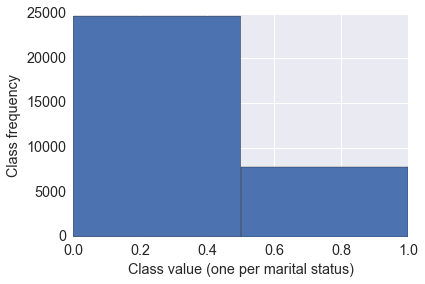

In [11]:
# This code shows a graphical representation of the class value distribution for the income variable.
# This code was built upon the example provided in the "Grand Poobah Classification Notebook" from course materials

print( 'Size of the dataset:', df_income['income'].shape)
print( 'Number of unique classes:', len(df_income['income'].unique()))

plt.hist(df_income['income'], bins=len(df_income['income'].unique()))
plt.xlabel('Class value (one per marital status)')
plt.ylabel('Class frequency')
plt.show()

Now, while both classes have  large frequency we still see that those with less than 50,000 USD of income a year number about three times as many individuals as those who make greater than 50,000 USD of income a year.  As such we feel that stratifying the k-fold cross validation will help prevent against any training/test splits that could have fewer than desired "1" classifications due to random chance.  
  
As for the marital-status classification task, we absolutely must stratify the cross validation because there are more classes and a far greater discrepancy in the relative frequency of those classes.  In fact, there are some classes with over 10,000 individuals classified by them whereas other classes describe almost no one.  Furthermore we must use 10 folds rather than 5 because of the small class frequency for some of these class values.  You can see more graphical details on the class frequency distribution below:

Size of the dataset: (32561,)
Number of unique classes: 7


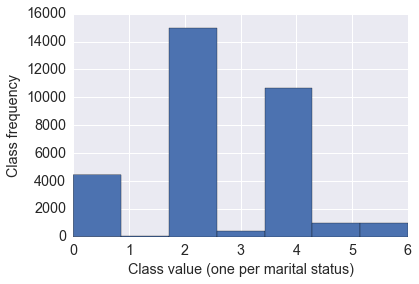

In [12]:
# This code shows a graphical representation to the one above, this time for the marital-status variable.
# This code was built upon the example provided in the "Grand Poobah Classification Notebook" from course materials

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

print( 'Size of the dataset:', df_income['marital-status'].shape)
print( 'Number of unique classes:', len(df_income['marital-status'].unique()))

maritalplot = encoder.fit_transform(df_income['marital-status'])

plt.hist(maritalplot, bins=7)
plt.xlabel('Class value (one per marital status)')
plt.ylabel('Class frequency')
plt.show()

### • [20 points] Create three different classification/regression models 
(e.g., random forest, KNN, and SVM). Two modeling techniques must be new (but the third could be SVM or
logistic regression). Adjust parameters as appropriate to increase generalization
performance using your chosen metric.  

In [10]:
# Here we set the one-hot encoded "dummy" variables as the X and the original target variable (where 0 is <50K and 1 is >=50K) will
# become our y.  We also initialize a y_hat variable.
X = df_dummies
y = np.array(target)
y_hat = np.zeros(len(target)) 

# This creates our K fold model with 5 folds.
cv = StratifiedKFold(y, n_folds=5)

In [13]:
# The following code section was built referencing the section 06 Classification notebook from our class materials.

# This code will fit a K Nearest Neighbors classifier with 4 neighbors.  As mentioned before we will do 5 fold cross validation
# for classifiers run against the income target variable for the purpose of sacrificing a little bit of accuracy for a lot of 
# speed in running the models.

# This code iterates through the classifier task trying between 1 and 9 neighbors in the KNN. Eventually it finds that the 
# greatest accuracy is to be found when using 8 neighbors, which results in 83.69% accuracy as seen in the code output below.
for i in range(1,10):
    clf = KNeighborsClassifier(n_neighbors=i)
    for train, test in cv:
        clf.fit(X.iloc[train],y[train])
        y_hat[test] = clf.predict(X.iloc[test])
    total_accuracy = mt.accuracy_score(y, y_hat)
    print('KNN accuracy when using ', i, " neighbors: ", total_accuracy)

KNN accuracy when using  1  neighbors:  0.800558950892
KNN accuracy when using  2  neighbors:  0.825312490403
KNN accuracy when using  3  neighbors:  0.821627099905
KNN accuracy when using  4  neighbors:  0.832713982986
KNN accuracy when using  5  neighbors:  0.830564171862
KNN accuracy when using  6  neighbors:  0.836061546021
KNN accuracy when using  7  neighbors:  0.834310985535
KNN accuracy when using  8  neighbors:  0.836890758883
KNN accuracy when using  9  neighbors:  0.835785141734


### Results for KNN on Income target:  
As seen in the code output above, the very best accuracy we obtained from a KNN classifier for the income target was 83.69%, and we obtained that accuracy when using the 8 nearest neighbors in our algorithm.

In [12]:
# The following code section was built referencing the section 06 Classification notebook from our class materials.

# This section of code builds a random forest classifier, and tries it on a variety of depths and number of estimators to find
# the very best configuration for highest accuracy score.

depths = [10, 20, 30, 40, 50]
estimators = [50, 100, 150]

for estimator in estimators:
    for depth in depths:
        clf = RandomForestClassifier(max_depth=depth, n_estimators=estimator, n_jobs=-1, oob_score=True)
        for train, test in cv:
            clf.fit(X.iloc[train],y[train])
            y_hat[test] = clf.predict(X.iloc[test])
        total_accuracy = mt.accuracy_score(y, y_hat)
        print('The accuracy obtained from using a depth of ', depth, ' and ', estimator, ' estimators is: ', total_accuracy)

The accuracy obtained from using a depth of  10  and  50  estimators is:  0.856822579159
The accuracy obtained from using a depth of  20  and  50  estimators is:  0.861705721569
The accuracy obtained from using a depth of  30  and  50  estimators is:  0.856576886459
The accuracy obtained from using a depth of  40  and  50  estimators is:  0.848714720064
The accuracy obtained from using a depth of  50  and  50  estimators is:  0.84656490894
The accuracy obtained from using a depth of  10  and  100  estimators is:  0.856945425509
The accuracy obtained from using a depth of  20  and  100  estimators is:  0.863333435705
The accuracy obtained from using a depth of  30  and  100  estimators is:  0.855532692485
The accuracy obtained from using a depth of  40  and  100  estimators is:  0.850311722613
The accuracy obtained from using a depth of  50  and  100  estimators is:  0.847025582752
The accuracy obtained from using a depth of  10  and  150  estimators is:  0.857590368846
The accuracy obt

### Results for Random Forest on Income target:  
As seen in the code output above, the highest accuracy we obtained from a random forests classifier was 86.37%, and that was obtained from a classifier with a tree depth of 20 and 150 estimators.

In [40]:
# This code section was built referencing the section 04 notebook from class materials.

# This code builds a logistic regression classifier, then runs it for both the "l1" and "l2" penalty setting, cycling through
# a number of C Values for each.  This allows us to then determine the best tuned configuration settings for maximum accuracy.

penalties = ['l1','l2']
CValues = [0.05,0.10,0.15,0.25,0.5,0.75]

for penalty in penalties:
    for CValue in CValues:
        clf = LogisticRegression(penalty=penalty, C=CValue)
        for train, test in cv:
            clf.fit(X.iloc[train],y[train]) 
            y_hat[test] = clf.predict(X.iloc[test])
        total_accuracy = mt.accuracy_score(y, y_hat)
        print('For the penalty option of ', penalty, ' and a C Value of ', CValue, 'The accuracy obtained is: ', total_accuracy )

For the penalty option of  l1  and a C Value of  0.05 The accuracy obtained is:  0.849605356101
For the penalty option of  l1  and a C Value of  0.1 The accuracy obtained is:  0.849728202451
For the penalty option of  l1  and a C Value of  0.15 The accuracy obtained is:  0.8508338196
For the penalty option of  l1  and a C Value of  0.25 The accuracy obtained is:  0.850925954363
For the penalty option of  l1  and a C Value of  0.5 The accuracy obtained is:  0.851417339762
For the penalty option of  l1  and a C Value of  0.75 The accuracy obtained is:  0.851325205
For the penalty option of  l2  and a C Value of  0.05 The accuracy obtained is:  0.851540186112
For the penalty option of  l2  and a C Value of  0.1 The accuracy obtained is:  0.850803108013
For the penalty option of  l2  and a C Value of  0.15 The accuracy obtained is:  0.850987377538
For the penalty option of  l2  and a C Value of  0.25 The accuracy obtained is:  0.851110223887
For the penalty option of  l2  and a C Value of 

### Results for Logistic Regression on Income target:  
As seen in the code output above, the highest accuracy we obtained from a logistic regression classifier was 85.15%, and that was obtained from a classifier using the l2 penalty option and a C Value of 0.05.

In [ ]:
# This code section was built referencing the section 04 notebook from class materials.

# This code builds an SVM classifier, and runs looks to test that classifier with three C Values for
# each of three different kernel options to find out what settings we should tune for to see the very highest accuracy.

kernels = ['linear', 'poly', 'rbf']
CValues = [0.25,0.5,0.75]

for kernel in kernels:
    for CValue in CValues:
        clf = SVC(C=CValue, kernel=kernel, degree=3, gamma='auto') 
        for train, test in cv:
            clf.fit(X.iloc[train], y[train]) 
            y_hat[test] = clf.predict(X.iloc[test])
        total_accuracy = mt.accuracy_score(y, y_hat)
        print('For the SVM kernel ', kernel, " and the C Value of ", CValue, " the accuracy obtained is: ", total_accuracy )

In [11]:
# This code is for testing the SVM classifier, which seems to have a harder time running on my equipment compared
# to the other classifiers

clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto')
for train, test in cv:
    clf.fit(X.iloc[train], y[train]) 
    y_hat[test] = clf.predict(X.iloc[test])
    
total_acuracy = mt.accuracy_score(y, y_hat)
print('accuracy', total_accuracy)

KeyboardInterrupt: 

### Results for SVM on Income target:

In [20]:
# Here we set up a new target variable "maritaltarget" that includes the integer classification of the marital statuses included
# in the data.  We then drop the marital-status column from the income dataset, and set our X as the newly formed dummy variable
# dataset for the classification of the marriage status target variable.

maritaltarget = maritalplot
df_intermediateMarriage = df_income.drop('marital-status', axis=1)
df_dummiesMarriage = pd.get_dummies(df_intermediateMarriage)

#Now that we have newly formed datasets targeting the marital-status classification we will re-set our X, y, and y_hat variables.
X = df_dummiesMarriage
y = np.array(maritaltarget)
y_hat = np.zeros(len(maritaltarget)) 

# This recreates our K fold model, only now with 10 folds rather than 5.
cv = StratifiedKFold(y, n_folds=10)

In [21]:
# The following code section was built referencing the section 06 Classification notebook from our class materials.

# This code repeats the previous KNN classification task, only this time it will give us the accuracy of the classification for
# the marital status target variable because we have changed our X and y variables.

for i in range(1,10):
    clf = KNeighborsClassifier(n_neighbors=i)
    for train, test in cv:
        clf.fit(X.iloc[train],y[train])
        y_hat[test] = clf.predict(X.iloc[test])
    total_accuracy = mt.accuracy_score(y, y_hat)
    print('KNN accuracy when using ', i, " neighbors: ", total_accuracy)

KNN accuracy when using  1  neighbors:  0.717391971991
KNN accuracy when using  2  neighbors:  0.705291606523
KNN accuracy when using  3  neighbors:  0.739227910691
KNN accuracy when using  4  neighbors:  0.739565738153
KNN accuracy when using  5  neighbors:  0.743404686588
KNN accuracy when using  6  neighbors:  0.744663861675
KNN accuracy when using  7  neighbors:  0.745370228187
KNN accuracy when using  8  neighbors:  0.744878842787
KNN accuracy when using  9  neighbors:  0.744940265962


### Results for KNN on Marital Status target:  
The best accuracy recorded for the KNN on the Marital Status target was 74.49%, which we obtained when using 9 neighbors.


In [22]:
# The following code section was built referencing the section 06 Classification notebook from our class materials.

# This code repeats the previous Random Forest classification task, only this time it will give us the accuracy of the classification for
# the marital status target variable because we have changed our X and y variables.

depths = [10, 20, 30, 40, 50]
estimators = [50, 100, 150]

for estimator in estimators:
    for depth in depths:
        clf = RandomForestClassifier(max_depth=depth, n_estimators=estimator, n_jobs=-1, oob_score=True)
        for train, test in cv:
            clf.fit(X.iloc[train],y[train])
            y_hat[test] = clf.predict(X.iloc[test])
        total_accuracy = mt.accuracy_score(y, y_hat)
        print('The accuracy obtained from using a depth of ', depth, ' and ', estimator, ' estimators is: ', total_accuracy)

The accuracy obtained from using a depth of  10  and  50  estimators is:  0.831884770124
The accuracy obtained from using a depth of  20  and  50  estimators is:  0.840207610331
The accuracy obtained from using a depth of  30  and  50  estimators is:  0.83010349805
The accuracy obtained from using a depth of  40  and  50  estimators is:  0.823807622616
The accuracy obtained from using a depth of  50  and  50  estimators is:  0.822916986579
The accuracy obtained from using a depth of  10  and  100  estimators is:  0.832314732349
The accuracy obtained from using a depth of  20  and  100  estimators is:  0.840576149381
The accuracy obtained from using a depth of  30  and  100  estimators is:  0.82985780535
The accuracy obtained from using a depth of  40  and  100  estimators is:  0.824237584841
The accuracy obtained from using a depth of  50  and  100  estimators is:  0.824513989128
The accuracy obtained from using a depth of  10  and  150  estimators is:  0.832222597586
The accuracy obta

### Results for Random Forest on Marital Status target:  
The best accuracy we saw from the random forest classifier was 84.13%, which we saw when using a depth of 20 and 150 estimators.

In [23]:
# This code section was built referencing the section 04 notebook from class materials.

# This code repeats the previous Logistic Regression classification task, only this time it will give us the accuracy of the classification for
# the marital status target variable because we have changed our X and y variables.

penalties = ['l1','l2']
CValues = [0.05,0.10,0.15,0.25,0.5,0.75]

for penalty in penalties:
    for CValue in CValues:
        clf = LogisticRegression(penalty=penalty, C=CValue)
        for train, test in cv:
            clf.fit(X.iloc[train],y[train]) 
            y_hat[test] = clf.predict(X.iloc[test])
        total_accuracy = mt.accuracy_score(y, y_hat)
        print('For the penalty option of ', penalty, ' and a C Value of ', CValue, 'The accuracy obtained is: ', total_accuracy )

For the penalty option of  l1  and a C Value of  0.05 The accuracy obtained is:  0.83864131937
For the penalty option of  l1  and a C Value of  0.1 The accuracy obtained is:  0.839040570007
For the penalty option of  l1  and a C Value of  0.15 The accuracy obtained is:  0.838794877307
For the penalty option of  l1  and a C Value of  0.25 The accuracy obtained is:  0.83888701207
For the penalty option of  l1  and a C Value of  0.5 The accuracy obtained is:  0.839194127944
For the penalty option of  l1  and a C Value of  0.75 The accuracy obtained is:  0.839409109057
For the penalty option of  l2  and a C Value of  0.05 The accuracy obtained is:  0.838794877307
For the penalty option of  l2  and a C Value of  0.1 The accuracy obtained is:  0.838733454132
For the penalty option of  l2  and a C Value of  0.15 The accuracy obtained is:  0.83900985842
For the penalty option of  l2  and a C Value of  0.25 The accuracy obtained is:  0.839194127944
For the penalty option of  l2  and a C Value o

### Results for Logistic Regression on Marital Status target:  
The best accuracy we saw from the Logistic Regression classifier was 84.00%, which we saw when using the penalty option "l2" and a C value of 0.5.


In [ ]:
# This code section was built referencing the section 04 notebook from class materials.

# This code repeats the previous SVM classification task, only this time it will give us the accuracy of the 
# classification for the marital status target variable because we have changed our X and y variables.

kernels = ['linear', 'poly', 'rbf']
CValues = [0.25,0.5,0.75]

for kernel in kernels:
    for CValue in CValues:
        clf = SVC(C=CValue, kernel=kernel, degree=3, gamma='auto') 
        for train, test in cv:
            clf.fit(X.iloc[train], y[train]) 
            y_hat[test] = clf.predict(X.iloc[test])
        total_accuracy = mt.accuracy_score(y, y_hat)
        print('For the SVM kernel ', kernel, " and the C Value of ", CValue, " the accuracy obtained is: ", total_accuracy )

### Results for SVM on Marital Status target:  


### • [10 points] Analyze the results using your chosen method of evaluation. 
Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why
they are interesting to someone that might use this model. 

Using the different classification tasks listed, we saw the following accuracy scores from the best tuning of each classification task:  
### For the binary target "income":
#### KNN = 83.69%
#### Random Forest = 86.37%
#### Logistic Regression = 85.15%
#### SVM = TBD
  
### For the multinomial target "marital-status":
#### KNN = 74.49%
#### Random Forest = 84.13%
#### Logistic Regression = 84.00%
#### SVM = TBD


### • [10 points] Discuss the advantages of each model for each classification task, if any. 
If there are not advantages, explain why. Is any model better than another? Is the
difference significant with 95% confidence? Use proper statistical comparison methods.  

For both the binomial class prediction and the multinomial class prediction it appears that Random Forest classification gave us the very best results in terms of accuracy.  In the binary class prediction there does not appear to be a major discrepancy in accuracy between the highest (random forests) and the lowest (KNN).  Furthermore, there was not a significant difference in speed of performance for any of the classification tasks run.  However, for the multinomial classification task on the target variable "marital-status" there was a much larger difference observed between the accuracy of the random forests classifier (84.13%) and the accuracy of the KNN classifier (74.49%).  There was little difference between using a random forest classifier and logistic regression either way.

### • [10 points] Which attributes from your analysis are most important? 
Use proper methods discussed in class to evaluate the importance of different attributes. Discuss
the results and hypothesize about why certain attributes are more important than others
for a given classification task.  

## • Deployment (5 points total)  
### • [5 points] How useful is your model for interested parties 

<font color='blue'>

(i.e., the companies or organizations that might want to use it for prediction)? How would you measure the
model's value if it was used by these parties? How would your deploy your model for
interested parties? What other data should be collected? How often would the model
need to be updated, etc.?

</font>

Organizations that may be interested in our model include economists, social scientists, and legislators.  Economists will be interested in seeing what factors contribute to an individual's general income level so that they can better understand modern economical factors that affect the population (in our case US workers).  Social scientists will be interested in seeing what factors contribute to a person's marital status so that they can better understand how the economic health of a family affects the health of the marriage.  Finally, legislators and other government officials will be interested in both of these effects so that they can draft legislation to support individual welfare for their citizens and the economic health of their country as a whole.  
  
We would measure the model's value for these parties by how accurately it is able to predict both of its classifications.  This is because the more accurately it predicts the class of individuals in the model the more useful any action taken by the legislators and other interested parties can be expected to be.  For example, if the classification is only 20% predictive of an individuals economic or marital health, then an economist or social scientist lecturer will not be likely to include the model in their class materials.  However, if that classification is 95% accurate in predicting the class then not only will these scientists be wise to teach concepts based on the model results but that model can be used reliably in their future research.  Likewise, if a legislator drafts a new law based upon results of the model and the model is inaccurate then that law will be ineffective at combating the effects that they thought were real but were really just based on modeling error.  
  
For economists and social scientists we would deploy this model by sharing both the results of our model and the code that produced those results, which will allow them to perform similar classification on other populations of interest to their studies and research.  For legislators we would instead show them only the results but not the code (which they would not be trained to understand) in order to provide a proof of concept.  After obtaining funding from those legislators we would then move forward with deploying this model against Census data for their country, which would not only help train the model to that country's specific situation but would provide historical insight into the situations the country's citizens have recently found themselves in.  Finally, we would prepare the code such that when new Census data was received one could quickly feed that data into the model and receive actionable insights tailored specifically to that country's situation.  
  
The other data that would be collected for this model include historical Census data specific to the country for which we are applying the model (as the existing data is restricted to a population of US individuals), as well as future Census data that would be collected after the initial model had already been built.  In this situation the model would need to be updated every Census cycle as new data is collected, which for the US would be every 10 years.  If the customer for the model is an economist or social scientist that is unaffiliated with any government entity but is interested in doing their own research, then the additional data needed will be survey data from the population of interest for their research.  In this situation the model will need to be updated anytime new survey data is collected.  

## • Exceptional Work (10 points total)
### • You have free reign to provide additional modeling.  
### • One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes.  
Which parameters are most significant for making a
good model for each classification algorithm?

# All Beware the Graveyard of Unused Code!

In [11]:
# We did not end up using the code below as using a label encoder was inferior to creating a one-hot encoding because the 
# labelencoder assumes some positional relationship between values in our categorical variables, such as 2 being greater than 1 
# when 2 really just represents "divorced" and 1 represents "single" or something.  As such we banished the label encoder to the 
# spooky graveyard of unused code.

# This code turns all of our string entries into integer entries for the purposes of feeding them into the SVM.
# The code in this section is based upon examples found at scikit-learn.org/stable/modules/preprocessing.html#label-encoding

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df_income['workclass'] = encoder.fit_transform(df_income['workclass'])
df_income['native-country'] = encoder.fit_transform(df_income['native-country'])
df_income['education'] = encoder.fit_transform(df_income['education'])
df_income['marital-status'] = encoder.fit_transform(df_income['marital-status'])
df_income['occupation'] = encoder.fit_transform(df_income['occupation'])
df_income['relationship'] = encoder.fit_transform(df_income['relationship'])
df_income['race'] = encoder.fit_transform(df_income['race'])
df_income['sex'] = encoder.fit_transform(df_income['sex'])

df_income.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,9,13,4,1,1,4,1,2.174022,0,40,39,0
1,50,6,9,13,2,4,0,4,1,0.000000,0,13,39,0
2,38,4,11,9,0,6,1,4,1,0.000000,0,40,39,0
3,53,4,1,7,2,6,0,2,1,0.000000,0,40,39,0
4,28,4,9,13,2,10,5,2,0,0.000000,0,40,5,0
